In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
from testCases_v2 import *

In [73]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 #number of examples
    N = int(m/2) #number per point per class
    D = 2 #dimension
    X = np.zeros((m,D))
    Y = np.zeros((m,1),dtype='uint8')
    a = 4 #maximum ray of the flower
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 #theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 #radius
        X[ix] = np.c_[r*np.sin(t),r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T
    return X,Y

In [74]:
X,Y = load_planar_dataset()

In [75]:
X.shape

(2, 400)

In [76]:
Y.shape

(1, 400)

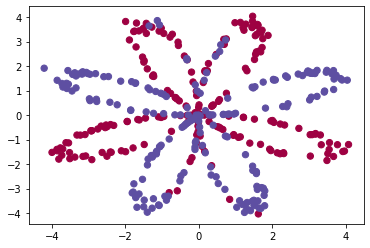

In [11]:
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral )

In [12]:
shape_X = X.shape
shape_Y = Y.shape
print('shape of X : '+ str(shape_X))
print('shape of Y : '+ str(shape_Y))
print('total training ' + str(shape_X[1]))

shape of X : (2, 400)
shape of Y : (1, 400)
total training 400


In [13]:
#logistic regression classifier
clf  = sklearn.linear_model.LogisticRegressionCV() #model
clf.fit(X.T,Y.T)

C:\Users\naelc\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegressionCV()

In [92]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


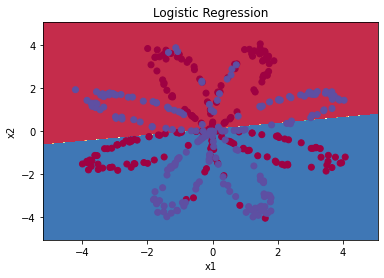

In [83]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [16]:
x_min,x_max = X[0, :].min() - 1, X[0,:].max() + 1
y_min,y_max = X[1,:].min() - 1,X[1,:].max() + 1

#generate a grid of points with distance h between them
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))
print(x_min)
print(x_max)

-5.211898112302497
5.078165875644617


In [17]:
cordi = np.c_[xx.ravel(),yy.ravel()] #creating x , y two dimension array

In [18]:
z = clf.predict(cordi)
z = z.reshape(xx.shape)


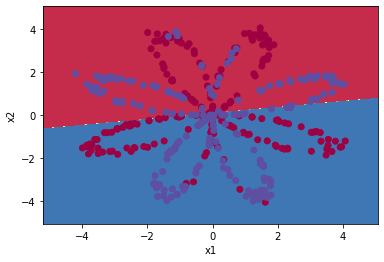

In [19]:
# Plot the contour and training examples
plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)

In [20]:
##as seen on the above logistic regression can't predict the model well

In [21]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_h = 4 # size of hidden layer is 4
    n_y = Y.shape[0]
    return n_x,n_h,n_y 

In [22]:
#init the model parameters
def init_parameters(n_x,n_h,n_y):
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)* 0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1" : W1,"b1":b1,"W2":W2,"b2":b2}
    return parameters

In [23]:
def sigmoid(z):
    A = 1/(1+np.exp(-z))
    return A

In [24]:
#forward propagation function intput is the traning set, weight and biases (parameters)
#1 hidden layer NN
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #computing Z
    Z1 = np.dot(W1,X) + b1 #W1 shape (n1,n0) , X shape (n0, m), Z1 shape (n1,m), b1 broadcasting
    A1 = np.tanh(Z1) #A1 shape (n1, m)
    Z2 = np.dot(W2,A1) + b2 #W2 shape (n2,n1),A1 shape (n1,m), Z2 shappe (n2, m)
    A2 = sigmoid(Z2)
    
    cache = {"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}
    
    return A2,cache

In [25]:
#testing init parameter
nx, nh, ny = initialize_parameters_test_case()
parameters = init_parameters(nx,nh,ny)
parameters

{'W1': array([[ 0.00814343,  0.0078047 ],
        [-0.01464054, -0.00154491],
        [-0.00092432, -0.00237875],
        [-0.00755663,  0.01851438]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 0.00209097,  0.01555016, -0.00569149, -0.01061797]]),
 'b2': array([[0.]])}

In [26]:
#testing forward propagationn
x_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(x_assess,parameters)
A2.shape

(1, 3)

In [27]:
#implement cost function

def compute_cost(A2,Y,parameters):
    m = Y.shape[1]
    
    logprobs = np.multiply(Y,np.log(A2)) + np.multiply((1-Y),np.log(1-A2))

    cost = (1/m)*np.sum(logprobs) * -1
    cost = float(np.squeeze(cost)) # we want ex : 18 not [[18]], so we use np.squeeze
    
    return cost

In [28]:
#testing comppute cost
A2 ,Y_assess, parameters = compute_cost_test_case()
print("A2 shape : "+ str(A2.shape))
print("Y shape : " + str(Y_assess.shape))
print("cost : "+ str(compute_cost(A2,Y_assess,parameters)))

A2 shape : (1, 3)
Y shape : (1, 3)
cost : 0.6930587610394646


In [29]:
# after forward propagation then backward propagation with gradient decent
def backward_propagation(parameters,cache, X,Y):
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    m = Y.shape[1]
    
    dZ2 = A2 - Y
    dW2 = (1/m)*(np.dot(dZ2,A1.T))
    db2 = (1/m)*(np.sum(dZ2,axis = 1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis = 1,keepdims=True)
    
    grads = {"dW1":dW1,"dW2":dW2,"db1":db1,"db2":db2}
    return grads


In [30]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters,cache, X_assess,Y_assess)
grads

{'dW1': array([[ 0.00301023, -0.00747267],
        [ 0.00257968, -0.00641288],
        [-0.00156892,  0.003893  ],
        [-0.00652037,  0.01618243]]),
 'dW2': array([[ 0.00078841,  0.01765429, -0.00084166, -0.01022527]]),
 'db1': array([[ 0.00176201],
        [ 0.00150995],
        [-0.00091736],
        [-0.00381422]]),
 'db2': array([[-0.16655712]])}

In [31]:
def update_parameters(parameters,grads,learning_rate):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    dw1 = grads['dW1']
    dw2 = grads['dW2']
    db1 = grads['db1']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate*dw1
    W2 = W2 - learning_rate*dw2
    b1 = b1 - learning_rate*db1
    b2 = b2 - learning_rate*db2
    
    
    parameters = {"W1" : W1,"b1":b1,"W2":W2,"b2":b2}
    return parameters

In [32]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads,1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [44]:
def nn_model(X,Y,n_h,num_iteration,print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    
    parameters = init_parameters(n_x,n_h,n_y)
    
    for i in range(num_iteration) :
        
        #forward propagation
        A2, cache = forward_propagation(X,parameters)
        #compute cost
        cost = compute_cost(A2,Y,parameters)
        #backward propagation returning gradient
        grads = backward_propagation(parameters,cache, X,Y)
        #update parameters
        
        parameters = update_parameters(parameters,grads,1.2)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return parameters

In [34]:
X_assess, Y_assess = nn_model_test_case()
print(X_assess.shape)
parameters = nn_model(X_assess, Y_assess, 4, 10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

(2, 3)
{'W1': array([[ 0.01788628,  0.0043651 ],
       [ 0.00096497, -0.01863493],
       [-0.00277388, -0.00354759],
       [-0.00082741, -0.00627001]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.00043818, -0.00477218, -0.01313865,  0.00884622]]), 'b2': array([[0.]])}
Cost after iteration 0: 0.693198
Cost after iteration 1000: 0.000219
Cost after iteration 2000: 0.000108
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000043
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000027
Cost after iteration 9000: 0.000024
W1 = [[ 0.56305445 -1.03925886]
 [ 0.7345426  -1.36286875]
 [-0.72533346  1.33753027]
 [ 0.74757629 -1.38274074]]
b1 = [[-0.22240654]
 [-0.34662093]
 [ 0.33663708]
 [-0.35296113]]
W2 = [[ 1.82196893  3.09657075 -2.98193564  3.19946508]]
b2 = [[0.21344644]]


In [85]:
#predict function does X -> forward propagation (with W1, W2, b1,b2)
def predict(parameters, X):
    A2, cache = forward_propagation(X,parameters)
    prediction  = (A2>0.5)
    
    return prediction

In [86]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


(2, 400)
Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220884
Cost after iteration 8000: 0.219483
Cost after iteration 9000: 0.218548
Cost after iteration 10000: 0.217820
Cost after iteration 11000: 0.217219
Cost after iteration 12000: 0.216707
Cost after iteration 13000: 0.216260
Cost after iteration 14000: 0.215863
Cost after iteration 15000: 0.215507
Cost after iteration 16000: 0.215184
Cost after iteration 17000: 0.214888
Cost after iteration 18000: 0.214617
Cost after iteration 19000: 0.214366
Cost after iteration 20000: 0.214133
Cost after iteration 21000: 0.213915
Cost after iteration 22000: 0.213712
Cost after iteration 23000: 0.213521
Cost after iteration 24000: 0.213341
Cost after iteration 25000: 0.213171
Cost after iteration 26000: 0.213010
Cost 

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

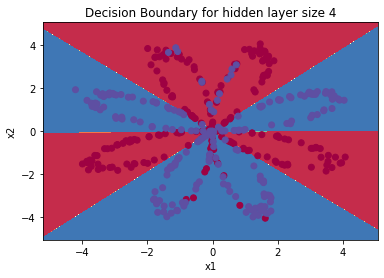

In [87]:
#testing with real dataset X,Y
print(X.shape)
parameters = nn_model(X,Y,4,100000,print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [38]:
#accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 91%


accuracy for 1 hidden units : 67.5 %
accuracy for 25 hidden units : 92.0 %
accuracy for 30 hidden units : 91.0 %
accuracy for 35 hidden units : 92.5 %
accuracy for 40 hidden units : 92.5 %
accuracy for 45 hidden units : 92.0 %
accuracy for 50 hidden units : 91.5 %
accuracy for 80 hidden units : 90.75 %


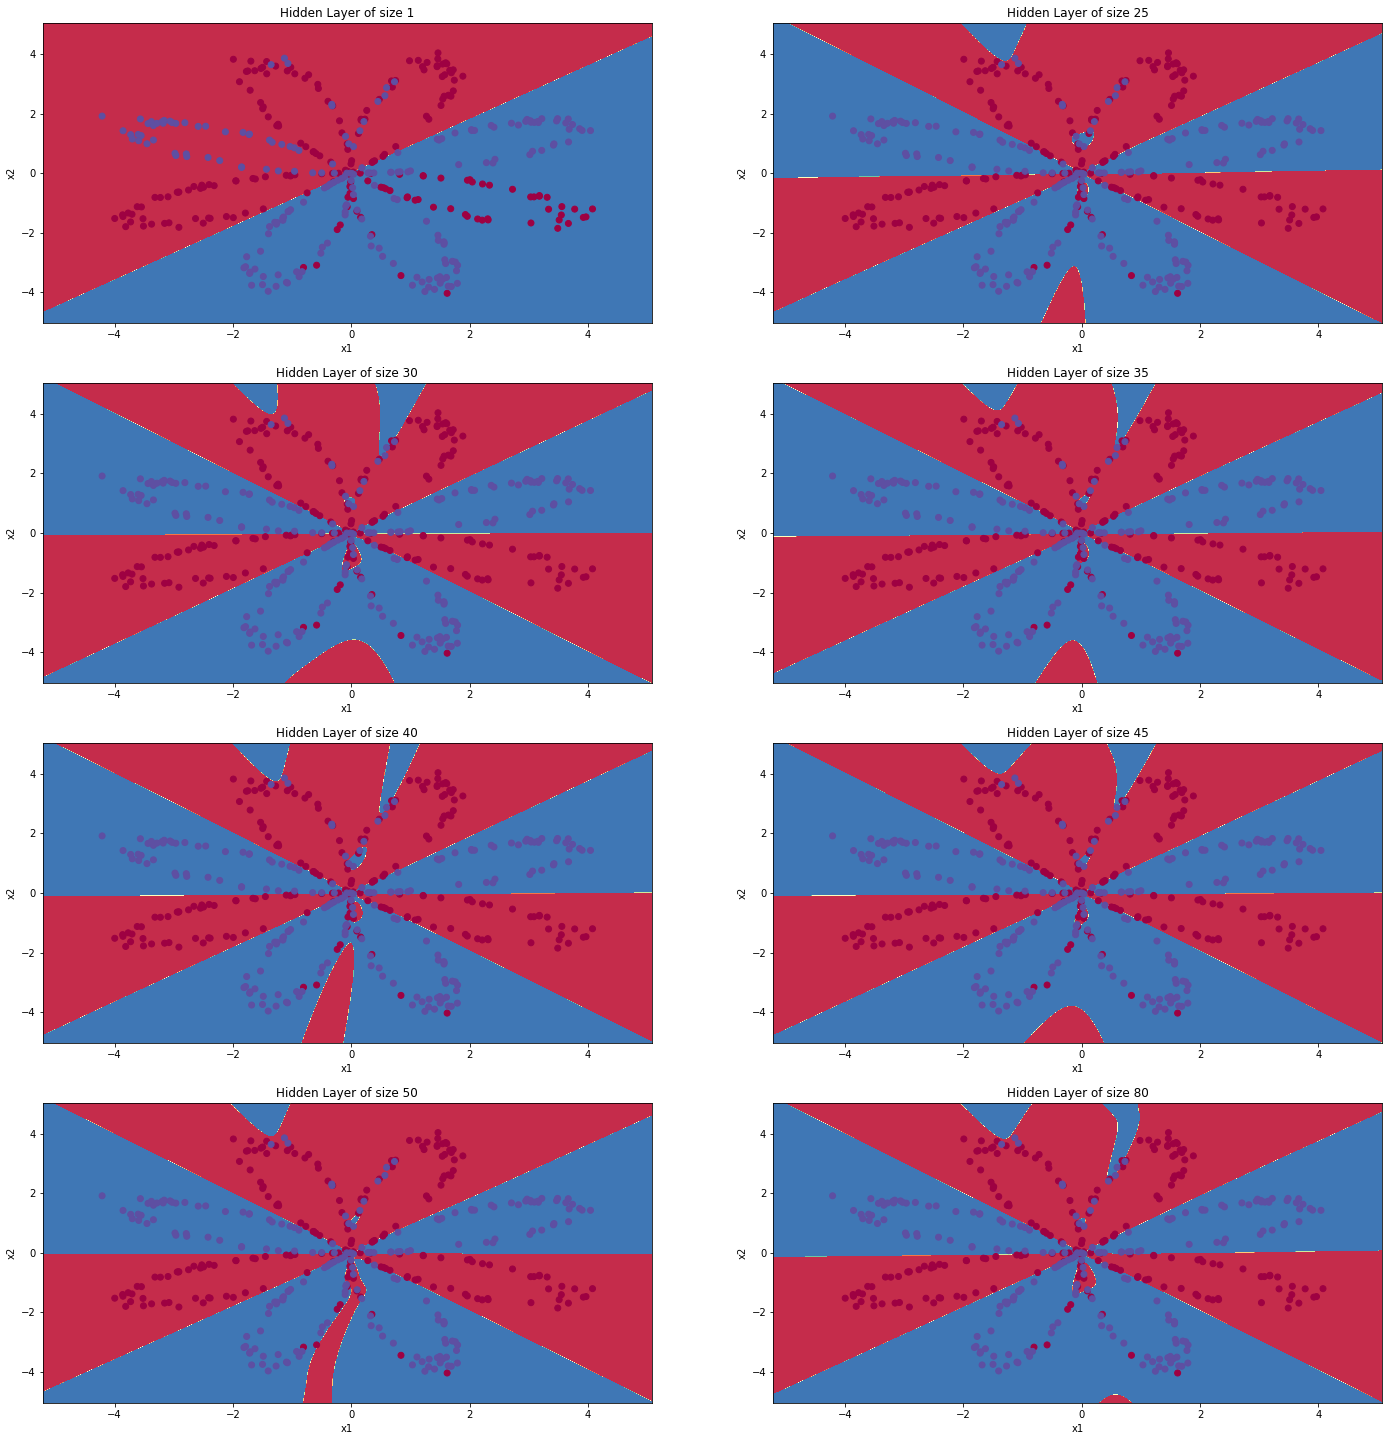

In [45]:
#Tuning hidden layer size [1,25,30,35,40,45,50,80] (aka the node size), but it's still 3 layer
plt.figure(figsize=(24,32))
hidden_layer =  [1,25,30,35,40,45,50,80]
for i,n_h in enumerate(hidden_layer):
    #i : index , n_h : layer
    plt.subplot(5,2,i+1)
    plt.title("Hidden Layer of size %d" % n_h)
    parameters = nn_model(X,Y,n_h,10000,print_cost=False)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters,X)
    accuracy =  float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print("accuracy for {} hidden units : {} %".format(n_h,accuracy))
    


In [89]:
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

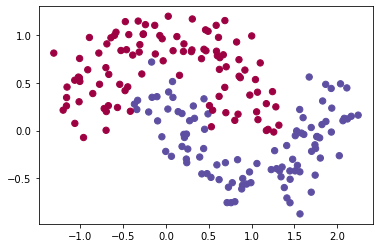

In [101]:
## data sets from sklearn
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {'noisy_circles':noisy_circles,
           'noisy_moons':noisy_moons,
           'blobs':blobs,
           'gaussian_quantiles':gaussian_quantiles}


X,Y = datasets['noisy_moons']
X,Y = X.T,Y.reshape(1,Y.shape[0])

if datasets == "blobs":
    Y=Y%2
    

plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Cost after iteration 0: 0.693267
Cost after iteration 1000: 0.300626
Cost after iteration 2000: 0.300512
Cost after iteration 3000: 0.300455
Cost after iteration 4000: 0.300419
accuracy for 80 hidden units : 85.0 %
(2, 200)
(1, 200)


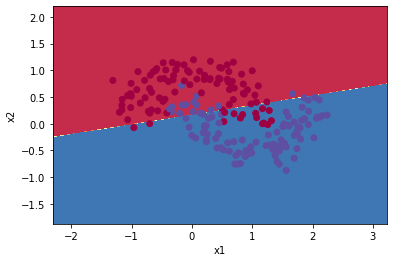

In [102]:
parameters = nn_model(X,Y,80,5000,print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
predictions = predict(parameters,X)
accuracy =  float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
print("accuracy for {} hidden units : {} %".format(n_h,accuracy))
print(X.shape)
print(Y.shape)

In [82]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [129]:
##decision plot excercise 

def plot_decision(parameters,X,Y) :
    x_min, x_max = X[0,:].min()-1, X[0,:].max() + 1
    y_min, y_max = X[1,:].min()-1, X[1,:].max() + 1
    
    h = 0.01
    #generate a grid of points with distance h between them 
    xx,yy = np.meshgrid(np.arange(x_min,x_max, h), np.arange(y_min,y_max,h))
    
    
    x = np.c_[xx.ravel(),yy.ravel()]
    Z = predict(parameters,x.T)
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)

Cost after iteration 0: 0.693026
Cost after iteration 1000: 0.301035
Cost after iteration 2000: 0.300879
Cost after iteration 3000: 0.301412
Cost after iteration 4000: 0.301395
Cost after iteration 5000: 0.301350
Cost after iteration 6000: 0.301316
Cost after iteration 7000: 0.301287
Cost after iteration 8000: 0.301261
Cost after iteration 9000: 0.301237


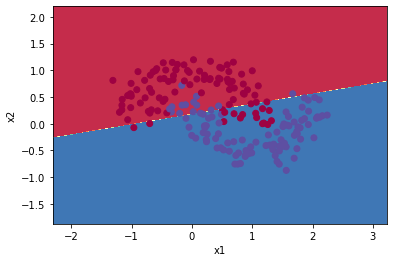

In [130]:
parameters = nn_model(X,Y,25,10000,print_cost=True)
plot_decision(parameters,X,Y)